In [1]:
import tensorflow as tf
from cycler import cycler
import os
import scipy
import h5py
import glob, os
from scipy.io import loadmat
import numpy as np
from numpy import interp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve,roc_curve,roc_auc_score,auc
from sklearn.metrics import precision_recall_fscore_support,precision_recall_curve
import matplotlib.pyplot as plt; plt.rcdefaults()
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

###### Determin the path where you saved the results##########

dirname2= "C:\\Users\\User\\CNNSMILEExperiment\\Results_test"

dirnameFG='C:\\Users\\User\\EyalRes100Epoch2\EvaluationResults_Corrected'
dirname="C:\\Users\\User\\CNNSMILEGRU_Pretrained\\Results"

dirnameCNNGRU='C:\\Users\\User\\CNGRU_ICASSP\\ResultsICASSP'

dirnameSpectogram="C:\\Users\\User\\Spectogram_Baseline1\\Results_Evaluation_Spectogram"


In [2]:
def ModifiedList(dirname, ListName):
    MyList=np.load(os.path.join(dirname, ListName))
    MyList=np.around(MyList,3)
    MyList=MyList*100
    return MyList

In [3]:
def PlotResults(mylist,objects):    
    
    percentage=mylist
    y_pos = np.arange(len(objects))
    
    return y_pos,percentage

In [4]:
def autolabel1(rects):

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                ('%.2f' % height),
        ha='right', va='bottom', rotation=45)

In [5]:
def autolabel2(rects):

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                ('%.2f' % height),
        ha='left', va='bottom', rotation=45,fontsize = 15)

In [6]:
def MeanStdVar(dirname,ListName):
    mylist=ModifiedList(dirname,ListName)

    ListMean=np.mean(mylist,axis=0)
    ListStd=np.std(mylist)
    ListVar=np.var(mylist)
    return ListMean,ListStd,ListVar

In [7]:
def MeanStdROC(dirname,fprname,tprname,AUC_ROCname):
    
    fpr=np.load(os.path.join(dirname,fprname+'.npy'),allow_pickle=True)
    tpr=np.load(os.path.join(dirname,tprname+'.npy'),allow_pickle=True)
    aucroc=np.load(os.path.join(dirname,AUC_ROCname+'.npy'),allow_pickle=True)
    
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i in range(len(fpr)):
    
        tprs.append(interp(mean_fpr, fpr[i], tpr[i]))
        tprs[-1][0] = 0.0
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0

    
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucroc)
    
    return mean_fpr, mean_tpr,mean_auc, std_auc

[0.7781208339275351, 0.7540780809510306, 0.8212968337696092, 0.8228748768896968, 0.8380073572106084]


<Figure size 1000x1000 with 0 Axes>

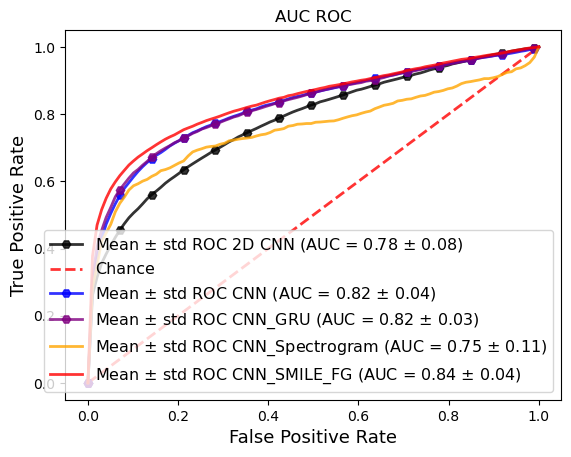

In [44]:
# plot AUC-ROCs

######Define the Prefix for each evaluated parameter of each model###### 

indx='_test_100_'

indplot='test'

indxFG='_test'

indgru='_test_100'

dcnn='2DCNN10times'


cnn='CNN10times'



smileFG='CNNSMILE10times'+indxFG+'_FG'

cnngru='CNNGRU'+indgru

CNNSpec='CNN_Spectogram_BaseLine1_ClassWeight_'+indplot+'_epoch_20_batchsize_256_ClassWeight'


##########Loading matrices and extracting mean and std of ROC##################

mean_fpr_dcnn, mean_tpr_dcnn,mean_auc_dcnn, std_dcnn=MeanStdROC(dirname2,'fpr_'+dcnn+indx,'tpr_'+dcnn+indx,'ROC_'+dcnn+indx)

mean_fpr_cnn, mean_tpr_cnn,mean_auc_cnn, std_cnn=MeanStdROC(dirname2,'fpr_'+cnn+indx,'tpr_'+cnn+indx,'ROC_'+cnn+indx)

mean_fpr_smileFG, mean_tpr_smileFG,mean_auc_smileFG, std_smileFG=MeanStdROC(dirnameFG,'fpr_'+smileFG,'tpr_'+smileFG,'ROC_'+smileFG)

mean_fpr_cnngru, mean_tpr_cnngru,mean_auc_cnngru, std_cnngru=MeanStdROC(dirnameCNNGRU,'fpr_'+cnngru,'tpr_'+cnngru,'ROC_'+cnngru)

mean_fpr_CNNSpec, mean_tpr_CNNSpec,mean_auc_CNNSpec, std_CNNSpec=MeanStdROC(dirnameSpectogram,'fpr_'+CNNSpec,'tpr_'+CNNSpec,'ROC_'+CNNSpec)

#############################################################################
print([mean_auc_dcnn,mean_auc_CNNSpec,mean_auc_cnn,mean_auc_cnngru,mean_auc_smileFG])

plt.figure(figsize=(10,10))

##
fig,ax=plt.subplots()


plt.plot(mean_fpr_dcnn, mean_tpr_dcnn, marker='H', markevery=7,color='black',
         label=r'Mean $\pm$ std ROC '+'2D CNN'+ ' '+'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_dcnn, std_dcnn),
         lw=2, alpha=.8)


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.plot(mean_fpr_cnn, mean_tpr_cnn, marker='H', markevery=7,color='blue',
         label=r'Mean $\pm$ std ROC '+'CNN'+ ' '+'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_cnn, std_cnn),
         lw=2, alpha=.8)


plt.plot(mean_fpr_cnngru, mean_tpr_cnngru, marker='H', markevery=7,color='purple',
         label=r'Mean $\pm$ std ROC '+'CNN_GRU'+ ' '+'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_cnngru, std_cnngru),
         lw=2, alpha=.8)

plt.plot(mean_fpr_CNNSpec, mean_tpr_CNNSpec, color='orange',
         label=r'Mean $\pm$ std ROC CNN_Spectrogram (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_CNNSpec, std_CNNSpec),
         lw=2, alpha=.8)

plt.plot(mean_fpr_smileFG, mean_tpr_smileFG, color='red',
         label=r'Mean $\pm$ std ROC '+'CNN_SMILE_FG'+ ' '+'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_smileFG, std_smileFG),
         lw=2, alpha=.8)

plt.title('AUC ROC')
plt.ylabel('True Positive Rate',fontsize=13)
plt.xlabel('False Positive Rate',fontsize=13)
plt.legend(loc="lower right", prop={'size': 11.5})
#plt.title("Mean and std of ROC for all models")
plt.show()

std without fg [17.76391473371415, 10.252113603220234, 12.968637382375817, 10.71613529009202, 13.682399480922765]


<Figure size 1000x1000 with 0 Axes>

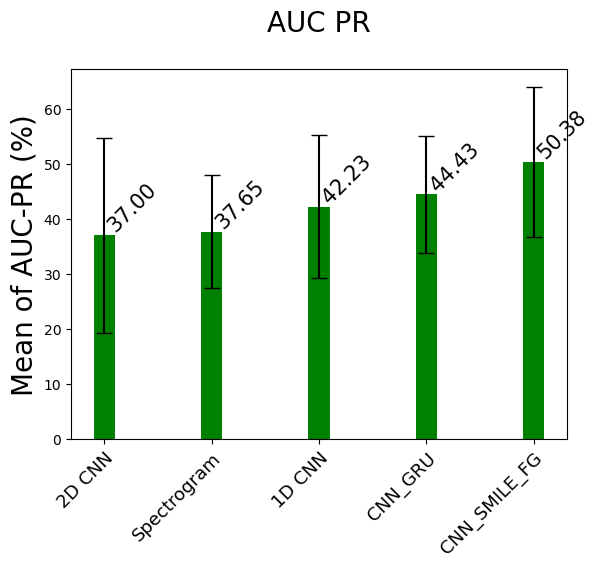

In [19]:
# plot AUC-PRs

######Define the Prefix for each evaluated parameter of each model###### 


indx='_test_100_'

indxFG='_test'

indgru='_test_100'

dcnn='2DCNN10times'

cnn='CNN10times'

smileFG='CNNSMILE10times'+indxFG+'_FG'

cnngru='CNNGRU'+indgru

CNNSpec='CNN_Spectogram_BaseLine1_ClassWeight'+indxFG+'_epoch_20_batchsize_256_ClassWeight'
##########Loading matrices and extracting mean and std of PR##################

Mean_dcnn,Std_dcnn,_=MeanStdVar(dirname2,'PR_'+dcnn+indx+'.npy')

Mean_cnn,Std_cnn,_=MeanStdVar(dirname2,'PR_'+cnn+indx+'.npy')

Mean_smileFG,Std_smileFG,_=MeanStdVar(dirnameFG,'PR_'+smileFG+'.npy')

Mean_cnngru,Std_cnngru,_=MeanStdVar(dirnameCNNGRU,'PR_'+cnngru+'.npy')

Mean_CNNSpec,Std_CNNSpec,_=MeanStdVar(dirnameSpectogram,'PR_'+CNNSpec+'.npy')


##
means=[Mean_dcnn,Mean_CNNSpec,Mean_cnn, Mean_cnngru,Mean_smileFG]
stds=[Std_dcnn,Std_CNNSpec,Std_cnn, Std_cnngru,Std_smileFG]
print("std without fg",stds)



objects2 = ('2DCNN','CNN_Spectrogram','CNN','CNN_GRU','CNN_SMILE_FG')

plt.figure(figsize=(10,10))
####
y_pos2,percentage2=PlotResults(means,objects2)

w=0.2
fig,ax=plt.subplots()
N =5
ind = np.arange(N)

rects2 = ax.bar(y_pos2, percentage2,yerr=stds,capsize=6, color='g',width=w)
ax.set_xticks(ind)
ax.set_xticklabels( ('2D CNN','Spectrogram','1D CNN','CNN_GRU','CNN_SMILE_FG' ),rotation=45,ha='right', rotation_mode='anchor',fontsize=13)

plt.ylabel('Mean of AUC-PR (%)',fontsize = 20)

autolabel2(rects2)

plt.title('AUC PR',x=0.5, y=1.08,fontsize = 20)
plt.show()


90.41666666666667
std without fg [3.3734255586865998, 3.4364063916959635, 2.5597308886330628, 6.863045161507308, 1.882743270396209]


<Figure size 1000x1000 with 0 Axes>

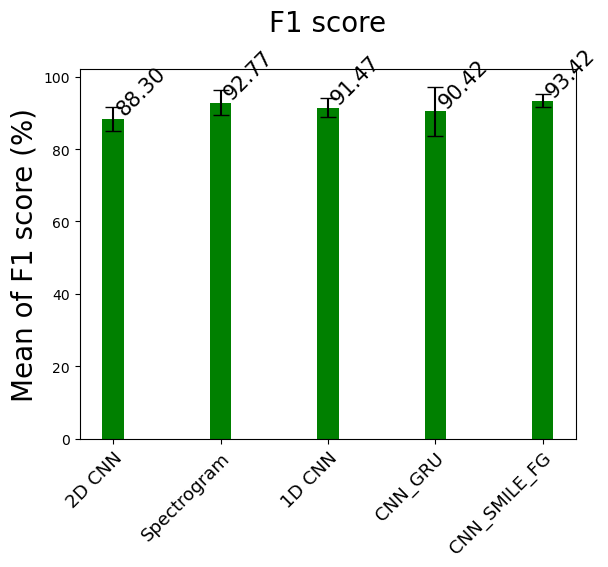

In [18]:
# plot F1 score

######Define the Prefix for each evaluated parameter of each model###### 

indx='_test_100'

indxFG='_test'

dcnn='2DCNN10times'

cnn='CNN10times'

smileFG='CNNSMILE10times'+indxFG+'_FG'

cnngru='CNNGRU'+indx

CNNSpec='CNN_Spectogram_BaseLine1_ClassWeight'+indxFG+'_epoch_20_batchsize_256_ClassWeight'


th= '_0.5'
##########Loading matrices and extracting mean and std of F1 score##################

Mean_dcnn,Std_dcnn,_=MeanStdVar(dirname2,'fscore_'+dcnn+indx+th+'.npy')

Mean_cnn,Std_cnn,_=MeanStdVar(dirname2,'fscore_'+cnn+indx+th+'.npy')

Mean_smileFG,Std_smileFG,_=MeanStdVar(dirnameFG,'fscore_'+smileFG+th+'.npy')

Mean_cnngru,Std_cnngru,_=MeanStdVar(dirnameCNNGRU,'fscore_'+cnngru+th+'.npy')

Mean_CNNSpec,Std_CNNSpec,_=MeanStdVar(dirnameSpectogram,'fscore_'+CNNSpec+th+'.npy')

##
means=[Mean_dcnn,Mean_CNNSpec,Mean_cnn, Mean_cnngru,Mean_smileFG]

print(Mean_cnngru)
stds=[Std_dcnn,Std_CNNSpec,Std_cnn, Std_cnngru,Std_smileFG]
print("std without fg",stds)



objects2 = ('2DCNN','Spectrogram','CNN','CNN_GRU','CNN_SMILE_FG')

plt.figure(figsize=(10,10))
####
y_pos2,percentage2=PlotResults(means,objects2)

w=0.2
fig,ax=plt.subplots()
N =5
ind = np.arange(N)

rects2 = ax.bar(y_pos2, percentage2,yerr=stds,capsize=6, color='g',width=w)
ax.set_xticks(ind)
ax.set_xticklabels( ('2D CNN','Spectrogram','1D CNN','CNN_GRU','CNN_SMILE_FG' ),rotation=45,ha='right', rotation_mode='anchor',fontsize=13)

plt.ylabel('Mean of F1 score (%)',fontsize = 20)

autolabel2(rects2)


plt.title('F1 score',x=0.5, y=1.08,fontsize = 20)
plt.show()